In [2]:
import pandas as pd

mat = pd.read_csv("train-student-mat.csv")

por = pd.read_csv("train-student-por.csv")

In [3]:
#과목별 평균을 기준으로 새로운 G1_X 열 만들기
por['G1_X'] = por['G1'] - por['G1'].mean()
mat['G1_X'] = mat['G1'] - mat['G1'].mean()


#열 이름 변경
#por.rename(columns={'G1': 'G1_por'}, inplace=True)
#mat.rename(columns={'G1': 'G1_mat'}, inplace=True)

#데이터 합치기
df = pd.concat([por, mat])

In [4]:
df['address'].unique()

array(['U', 'R'], dtype=object)

In [5]:
#df1 = df[df['address']=='R']

df1 = df

In [6]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G1_X
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,-11.399076
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,-2.399076
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,0.600924
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,2.600924
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,-0.399076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,-1.908861
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,3.091139
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,-0.908861
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,0.091139


In [7]:
df1[['G1', 'G1_X']].head(4)

,G1,G1_X
0,0,-11.399076
1,9,-2.399076
2,12,0.600924
3,14,2.600924


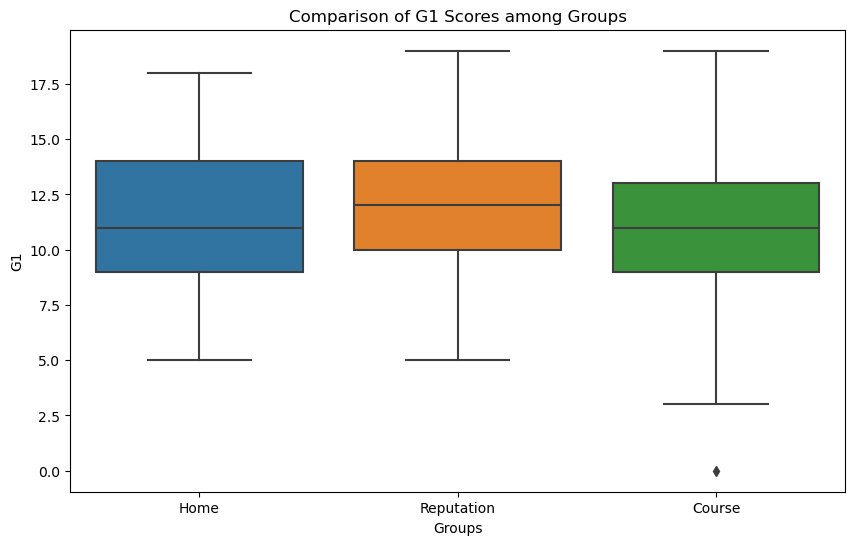

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임에서 각 그룹 추출
home = df1[df1['reason'] == 'home']['G1']
reputation = df1[df1['reason'] == 'reputation']['G1']
course = df1[df1['reason'] == 'course']['G1']

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=[home, reputation, course])
plt.xlabel('Groups')
plt.ylabel('G1')
plt.title('Comparison of G1 Scores among Groups')
plt.xticks(ticks=[0, 1, 2], labels=['Home', 'Reputation', 'Course'])
plt.show()


In [31]:
df1['Medu'].unique()

array([4, 1, 3, 2, 0], dtype=int64)

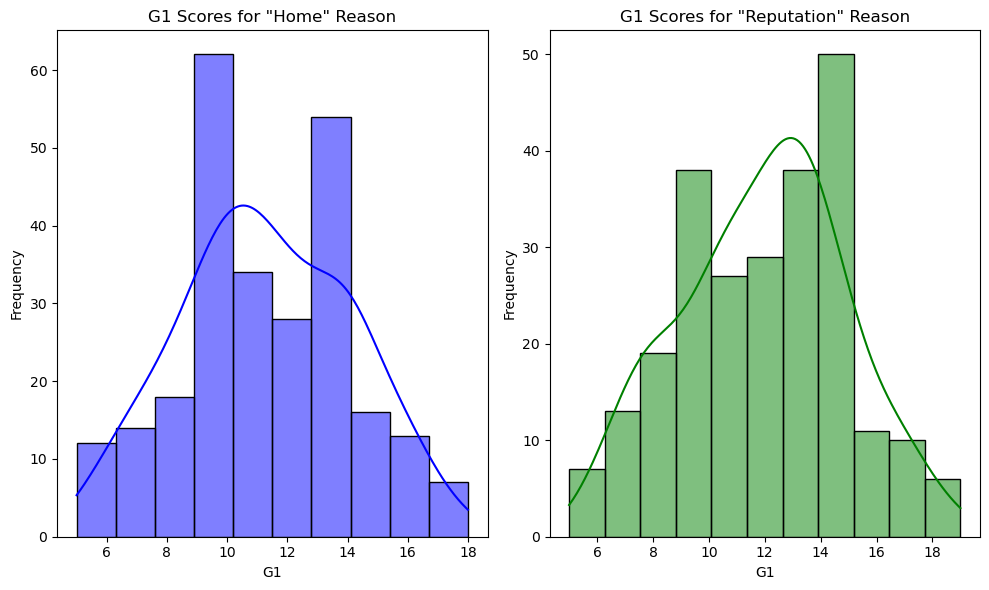

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'reason'이 'home'인 경우와 'reputation'인 경우에 대해 데이터 추출
home_data = df1[df1['reason'] == 'home']['G1']
reputation_data = df1[df1['reason'] == 'reputation']['G1']

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 'reason'이 'home'인 경우 그래프
plt.subplot(1, 2, 1)
sns.histplot(home_data, kde=True, color='blue')
plt.title('G1 Scores for "Home" Reason')
plt.xlabel('G1')
plt.ylabel('Frequency')

# 'reason'이 'reputation'인 경우 그래프
plt.subplot(1, 2, 2)
sns.histplot(reputation_data, kde=True, color='green')
plt.title('G1 Scores for "Reputation" Reason')
plt.xlabel('G1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [44]:
import pandas as pd

# 'Medu' 열의 값에 따라 데이터 그룹화
medu_groups = df1.groupby('Medu')

# 각 그룹에서 'reason'이 'home'인 경우의 개수 계산
home_counts_by_medu = medu_groups.apply(lambda x: (x['reason'] == 'home').sum())

# 각 그룹에서 전체 데이터 개수 계산
total_counts_by_medu = medu_groups.size()

# 'reason'이 'home'인 비율 계산
home_ratio_by_medu = home_counts_by_medu / total_counts_by_medu

# 결과 출력
result_df = pd.DataFrame({'Medu': home_ratio_by_medu.index, 'Home Reason Ratio': home_ratio_by_medu.values})

#글꼴 불러오기
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 



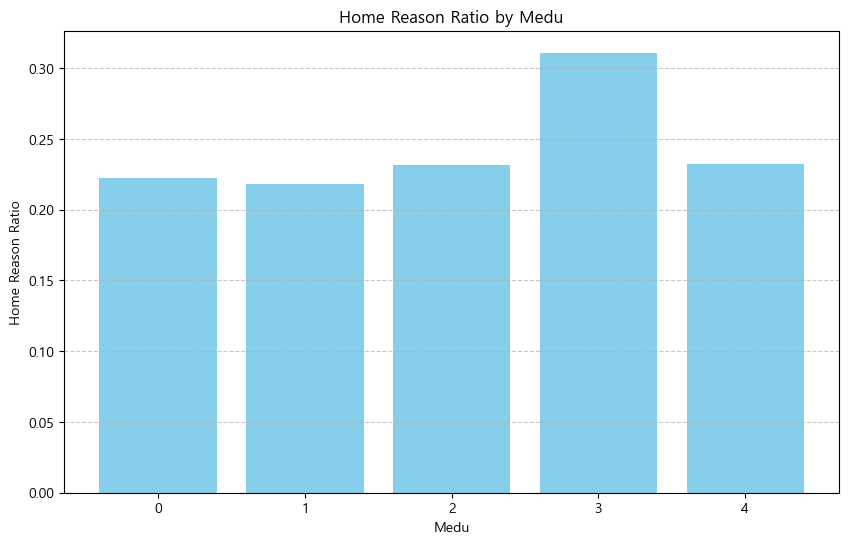

In [45]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(home_ratio_by_medu.index, home_ratio_by_medu.values, color='skyblue')
plt.xlabel('Medu')
plt.ylabel('Home Reason Ratio')
plt.title('Home Reason Ratio by Medu')
plt.xticks(home_ratio_by_medu.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


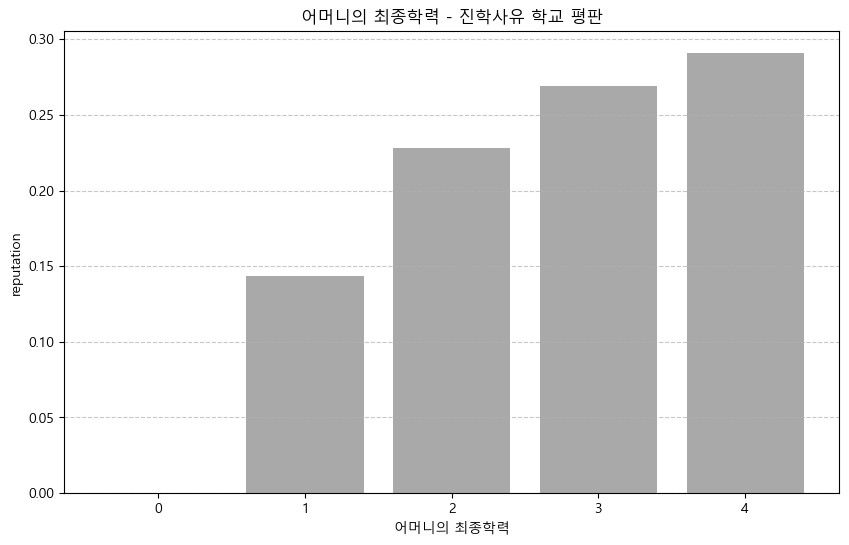

In [60]:
import pandas as pd

# 'Medu' 열의 값에 따라 데이터 그룹화
medu_groups = df1.groupby('Medu')

# 각 그룹에서 'reason'이 'home'인 경우의 개수 계산
home_counts_by_medu = medu_groups.apply(lambda x: (x['reason'] == 'reputation').sum())

# 각 그룹에서 전체 데이터 개수 계산
total_counts_by_medu = medu_groups.size()

# 'reason'이 'home'인 비율 계산
home_ratio_by_medu = home_counts_by_medu / total_counts_by_medu

# 결과 출력
result_df = pd.DataFrame({'Medu': home_ratio_by_medu.index, 'Home Reason Ratio': home_ratio_by_medu.values})

import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(home_ratio_by_medu.index, home_ratio_by_medu.values, color='darkgray')
plt.xlabel('어머니의 최종학력')
plt.ylabel('reputation')
plt.title('어머니의 최종학력 - 진학사유 학교 평판')
plt.xticks(home_ratio_by_medu.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


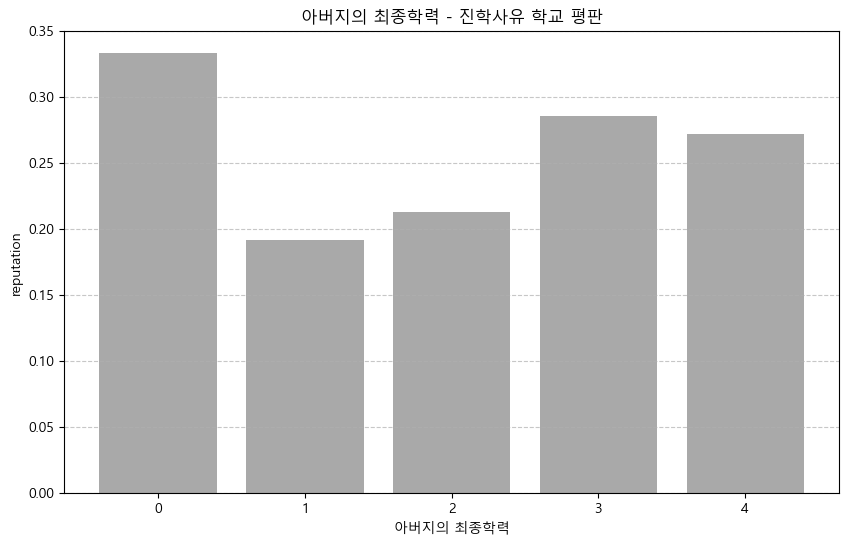

In [62]:
import pandas as pd

# 'Medu' 열의 값에 따라 데이터 그룹화
medu_groups = df1.groupby('Fedu')

# 각 그룹에서 'reason'이 'home'인 경우의 개수 계산
home_counts_by_medu = medu_groups.apply(lambda x: (x['reason'] == 'reputation').sum())

# 각 그룹에서 전체 데이터 개수 계산
total_counts_by_medu = medu_groups.size()

# 'reason'이 'home'인 비율 계산
home_ratio_by_medu = home_counts_by_medu / total_counts_by_medu

# 결과 출력
result_df = pd.DataFrame({'Medu': home_ratio_by_medu.index, 'Home Reason Ratio': home_ratio_by_medu.values})

import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(home_ratio_by_medu.index, home_ratio_by_medu.values, color='darkgray')
plt.xlabel('아버지의 최종학력')
plt.ylabel('reputation')
plt.title('아버지의 최종학력 - 진학사유 학교 평판')
plt.xticks(home_ratio_by_medu.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


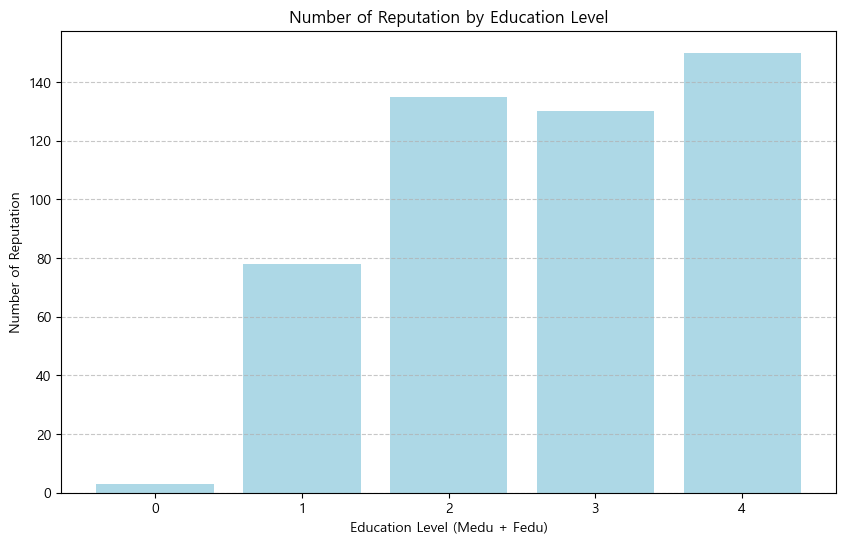

In [63]:
import matplotlib.pyplot as plt

# 'Medu' 값별로 'reputation'인 데이터 수 구하기
reputation_counts_by_medu = df1[df1['reason'] == 'reputation'].groupby('Medu').size()

# 'Fedu' 값별로 'reputation'인 데이터 수 구하기
reputation_counts_by_fedu = df1[df1['reason'] == 'reputation'].groupby('Fedu').size()

# 'Medu'와 'Fedu' 값별로 'reputation' 수 합산하기
reputation_counts_combined = reputation_counts_by_medu.add(reputation_counts_by_fedu, fill_value=0)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(reputation_counts_combined.index, reputation_counts_combined.values, color='lightblue')
plt.xlabel('Education Level (Medu + Fedu)')
plt.ylabel('Number of Reputation')
plt.title('Number of Reputation by Education Level')
plt.xticks(reputation_counts_combined.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


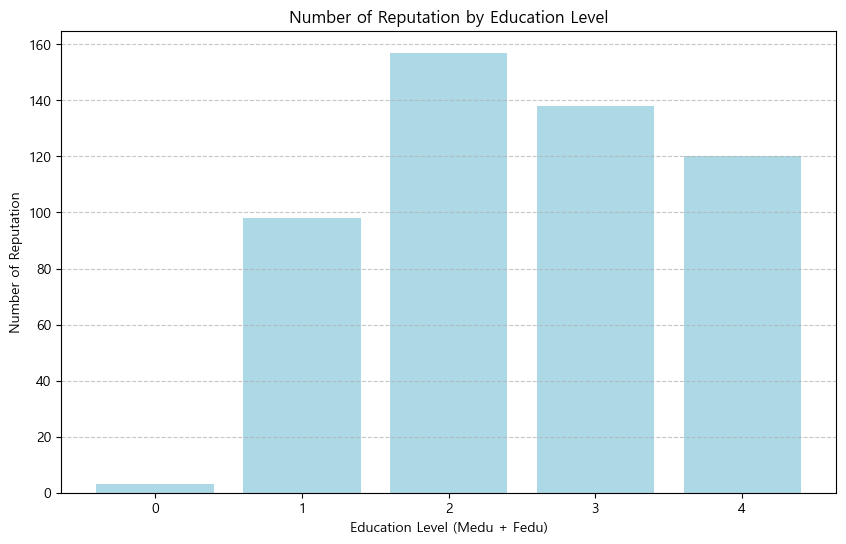

In [82]:
import matplotlib.pyplot as plt

# 'Medu' 값별로 'reputation'인 데이터 수 구하기
reputation_counts_by_medu = df1[df1['reason'] == 'home'].groupby('Medu').size()

# 'Fedu' 값별로 'reputation'인 데이터 수 구하기
reputation_counts_by_fedu = df1[df1['reason'] == 'home'].groupby('Fedu').size()

# 'Medu'와 'Fedu' 값별로 'reputation' 수 합산하기
reputation_counts_combined = reputation_counts_by_medu.add(reputation_counts_by_fedu, fill_value=0)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(reputation_counts_combined.index, reputation_counts_combined.values, color='lightblue')
plt.xlabel('Education Level (Medu + Fedu)')
plt.ylabel('Number of Reputation')
plt.title('Number of Reputation by Education Level')
plt.xticks(reputation_counts_combined.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [83]:
# 'Medu' 값별 데이터 수 구하기
medu_counts = df1['Medu'].value_counts().sort_index()

# 'Fedu' 값별 데이터 수 구하기
fedu_counts = df1['Fedu'].value_counts().sort_index()

# 데이터프레임으로 합치기
combined_df = pd.DataFrame({'Medu Counts': medu_counts, 'Fedu Counts': fedu_counts, 'total':combined_df['Medu Counts'] + combined_df['Fedu Counts'], 'home':reputation_counts_combined})

combined_df['ratio'] = combined_df['home']/ combined_df['total']

combined_df

,Medu Counts,Fedu Counts,total,home,ratio
0,9,9,18,3,0.166667
1,202,256,458,98,0.213974
2,289,324,613,157,0.256117
3,238,231,469,138,0.294243
4,306,224,530,120,0.226415


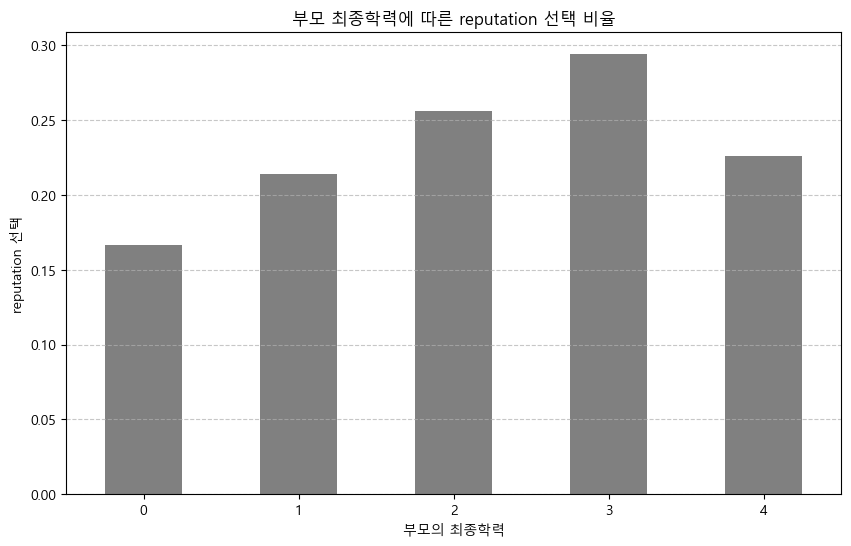

In [84]:
# 'ratio' 열 시각화
plt.figure(figsize=(10, 6))
combined_df['ratio'].plot(kind='bar', color='gray')
plt.xlabel('부모의 최종학력')
plt.ylabel('reputation 선택')
plt.title('부모 최종학력에 따른 reputation 선택 비율')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 'reputation_counts_combined'와 'combined_df'를 인덱스를 기준으로 합치기
merged_df = pd.concat([reputation_counts_combined, combined_df], axis=1)

# NaN 값이 있을 경우 0으로 채우기
merged_df.fillna(0, inplace=True)

# 시각화
merged_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Comparison of Reputation and Education Level (Medu + Fedu)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


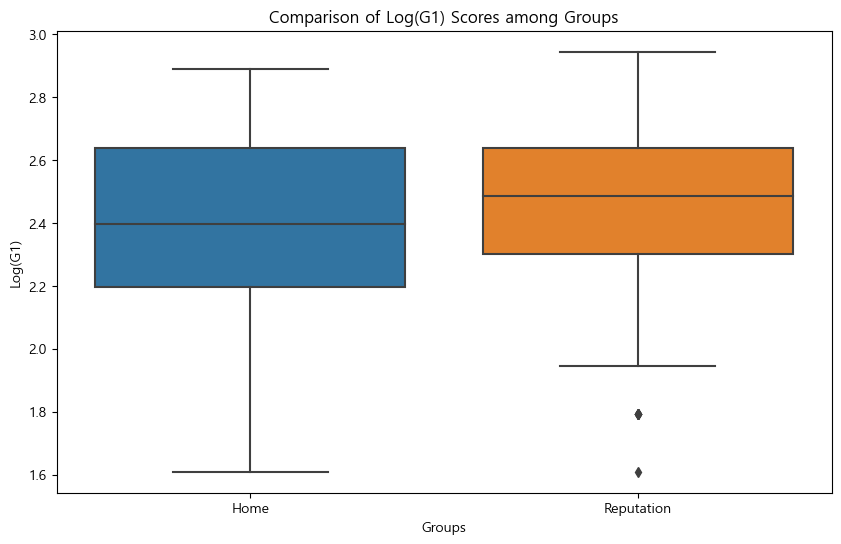

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임에서 각 그룹 추출
home = df1[df1['reason'] == 'home']['G1']
reputation = df1[df1['reason'] == 'reputation']['G1']
course = df1[df1['reason'] == 'course']['G1']

# 로그 변환 적용
home_log = np.log(home)
reputation_log = np.log(reputation)
course_log = np.log(course)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=[home_log, reputation_log])
plt.xlabel('Groups')
plt.ylabel('Log(G1)')
plt.title('Comparison of Log(G1) Scores among Groups')
plt.xticks(ticks=[0, 1], labels=['Home', 'Reputation'])
plt.show()

In [17]:
home['G1'].describe()

count    258.000000
mean      11.302326
std        2.850639
min        5.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       18.000000
Name: G1, dtype: float64

In [18]:
reput['G1'].describe()

count    248.000000
mean      11.951613
std        2.945812
min        5.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G1, dtype: float64

In [19]:
course['G1'].describe()

count    429.000000
mean      10.878788
std        2.978779
min        3.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

In [5]:
g1X = df1[['Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'traveltime', 'studytime',
       'failures','famrel','freetime', 'goout',
       'health', 'absences', 'address']]


g1y = df1['G1_X']

In [6]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 열에 대해 라벨 인코딩을 수행합니다.
for col in g1X.columns:
    if g1X[col].dtype == 'object':  # 문자열 형식인 열만 처리합니다.
        g1X[col] = label_encoder.fit_transform(g1X[col])

C:\Users\user\AppData\Local\Temp\ipykernel_22448\3706108745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1X[col] = label_encoder.fit_transform(g1X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_22448\3706108745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1X[col] = label_encoder.fit_transform(g1X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_22448\3706108745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

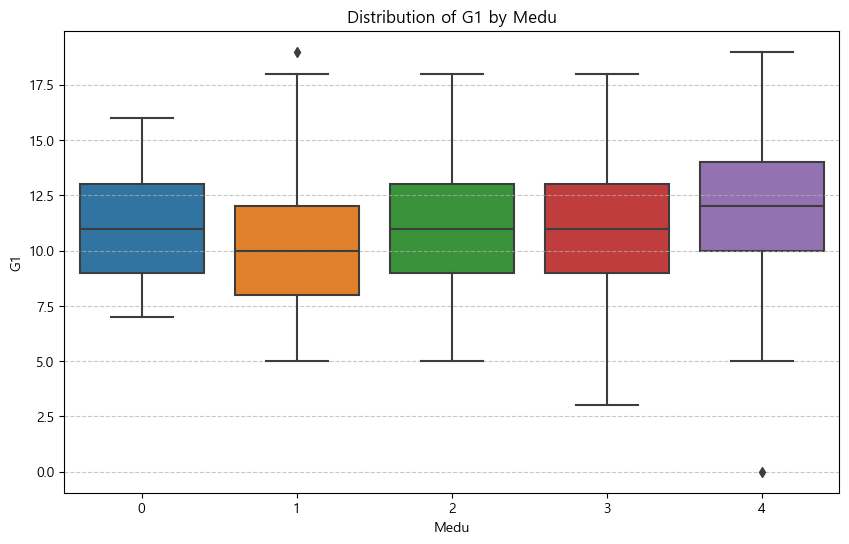

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Medu' 값에 따른 'G1' 분포를 박스플롯으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medu', y='G1', data=df1)
plt.xlabel('Medu')
plt.ylabel('G1')
plt.title('Distribution of G1 by Medu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


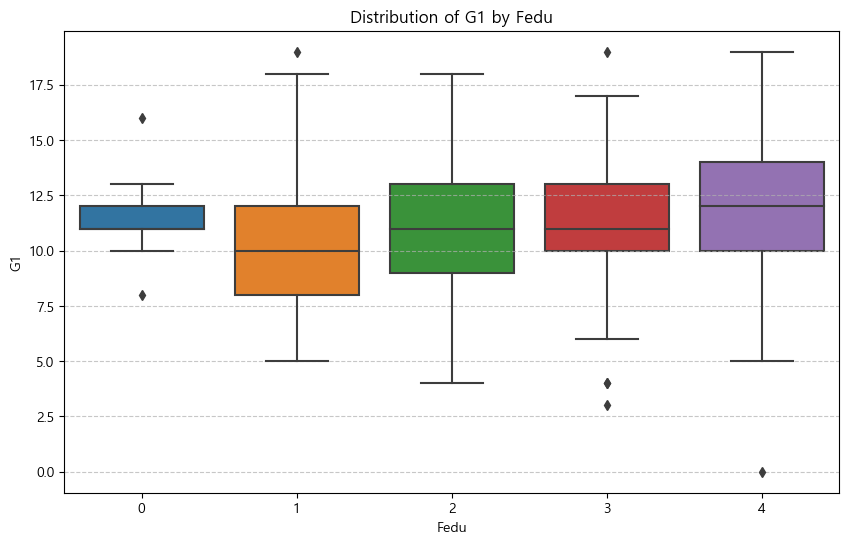

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Medu' 값에 따른 'G1' 분포를 박스플롯으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fedu', y='G1', data=df1)
plt.xlabel('Fedu')
plt.ylabel('G1')
plt.title('Distribution of G1 by Fedu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



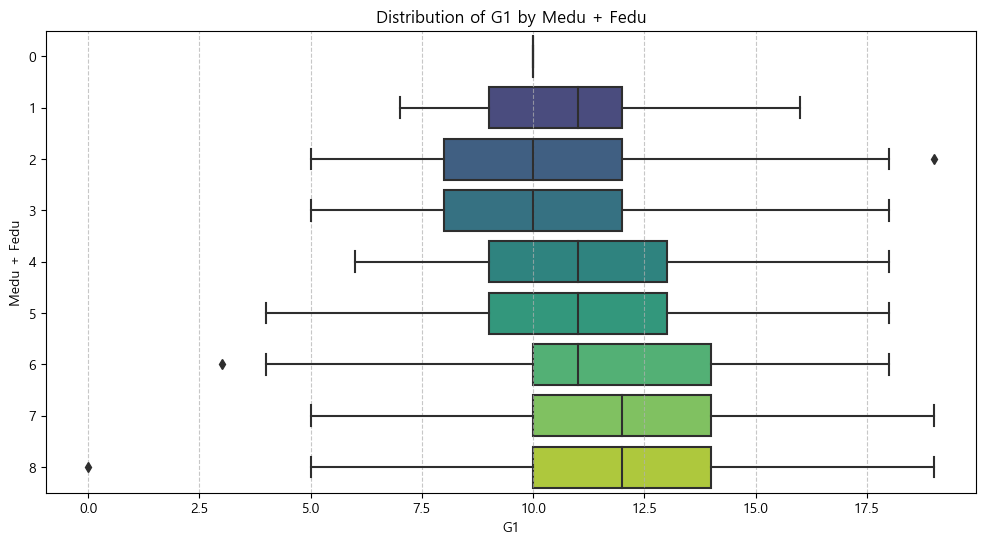

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Medu'와 'Fedu' 값을 합친 새로운 열 생성
df1['Edu'] = df1['Medu'] + df1['Fedu']

# 'Edu' 값에 따른 G1 분포를 박스플롯으로 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='G1', y='Edu', data=df1, orient='h', palette='viridis')
plt.xlabel('G1')
plt.ylabel('Medu + Fedu')
plt.title('Distribution of G1 by Medu + Fedu')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
